In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [79]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [80]:
df.drop(['id'], axis = 1, inplace = True)

In [81]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [82]:
cols_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [83]:
def encoder(element):
    global to_encode, encoded
    
    if element in to_encode:
        encoded.append(to_encode.pop(to_encode.index(element)))
        return encoded.index(element)
    elif element in encoded:
        return encoded.index(element)

In [84]:
for col in cols_to_encode:
    
    to_encode = df[col].unique().tolist()
    encoded = [" "]

    df[col] = df[col].apply(encoder)

In [85]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,2,61.0,0,0,1,2,2,202.21,NaN,2,1
2,1,80.0,0,1,1,1,2,105.92,32.5,2,1
3,2,49.0,0,0,1,1,1,171.23,34.4,3,1
4,2,79.0,1,0,1,2,2,174.12,24.0,2,1


In [86]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [87]:
df.bmi.mean()

28.893236911794673

In [88]:
df.shape

(5110, 11)

In [89]:
#Creating df with dropped rows, where bmi is nan
df_nona = df.dropna()

In [90]:
df.shape

(5110, 11)

In [91]:
df_nona.shape

(4909, 11)

In [92]:
#Creating df with bmi column nans replaced with mean of bmi
df_mean = df.copy()
df_mean.bmi = df_mean.fillna(df_mean.bmi.mean())

In [93]:
df.shape

(5110, 11)

In [94]:
df_mean.shape

(5110, 11)

In [95]:
df_nona.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,1.590548,42.865374,0.091872,0.049501,1.347321,1.842534,1.492768,105.305150,28.893237,2.583826,0.042575
std,0.492197,22.555115,0.288875,0.216934,0.476167,1.124057,0.499999,44.424341,7.854067,1.090146,0.201917
min,1.000000,0.080000,0.000000,0.000000,1.000000,1.000000,1.000000,55.120000,10.300000,1.000000,0.000000
25%,1.000000,25.000000,0.000000,0.000000,1.000000,1.000000,1.000000,77.070000,23.500000,2.000000,0.000000
50%,2.000000,44.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,2.000000,60.000000,0.000000,0.000000,2.000000,3.000000,2.000000,113.570000,33.100000,4.000000,0.000000
max,3.000000,82.000000,1.000000,1.000000,2.000000,5.000000,2.000000,271.740000,97.600000,4.000000,1.000000


In [96]:
df_mean.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5.110000e+03,5110.000000,5110.000000
mean,1.586301,43.226614,0.097456,0.054012,1.343836,1.837965,1.491977,106.147677,2.889324e+01,2.585519,0.048728
std,0.492941,22.612647,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,2.000374e-12,1.092522,0.215320
min,1.000000,0.080000,0.000000,0.000000,1.000000,1.000000,1.000000,55.120000,2.889324e+01,1.000000,0.000000
25%,1.000000,25.000000,0.000000,0.000000,1.000000,1.000000,1.000000,77.245000,2.889324e+01,2.000000,0.000000
50%,2.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.885000,2.889324e+01,2.000000,0.000000
75%,2.000000,61.000000,0.000000,0.000000,2.000000,3.000000,2.000000,114.090000,2.889324e+01,4.000000,0.000000
max,3.000000,82.000000,1.000000,1.000000,2.000000,5.000000,2.000000,271.740000,2.889324e+01,4.000000,1.000000


In [97]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

We see that we've got unbalanced dataset

In [98]:
df_mean.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,28.893237,1,1


In [99]:
df_nona.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

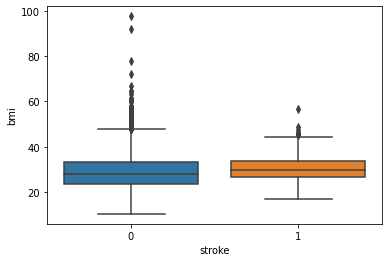

In [102]:
sns.boxplot(x = df_nona['stroke'], y = df_nona['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

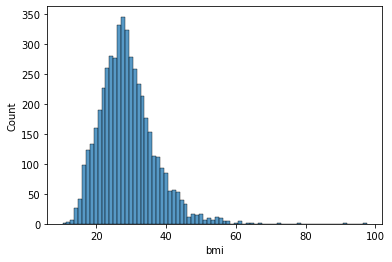

In [112]:
sns.histplot(x = df_nona.bmi)

In [111]:
df_nona[df_nona.bmi > 70]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,1,42.0,0,0,1,1,2,210.48,71.9,2,0
928,2,23.0,1,0,2,1,1,70.03,78.0,3,0
2128,1,17.0,1,0,2,1,2,61.67,97.6,4,0
4209,1,38.0,1,0,1,1,2,56.90,92.0,2,0


<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

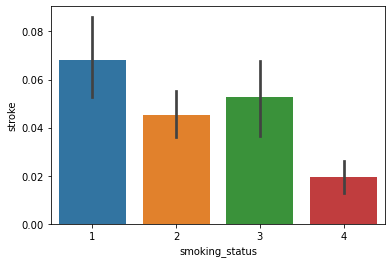

In [114]:
sns.barplot(y = df_nona.stroke, x = df_nona.smoking_status)

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

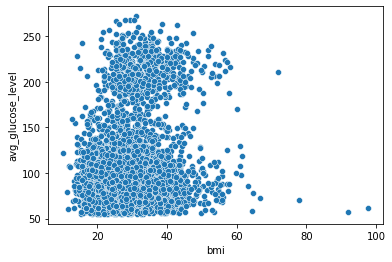

In [116]:
sns.scatterplot(y = df_nona.avg_glucose_level, x = df_nona.bmi)

<AxesSubplot:xlabel='hypertension', ylabel='bmi'>

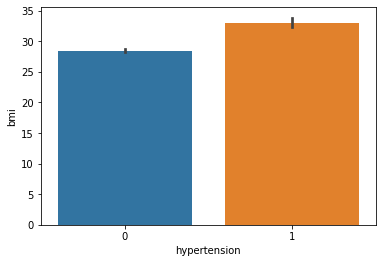

In [118]:
sns.barplot(x = df_nona.hypertension, y = df_nona.bmi)